In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("/home/shinigami/Downloads/haberman.data",header=None)
data_df = pd.DataFrame(data)
data_df.dropna(inplace=True)

In [4]:
data_df.columns = ['Age','Year','Nodes','Survival_status']
data_df.head(6)
# data_df['Survival_status'] = data_df['Survival_status'].astype(int)


,Age,Year,Nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1


In [5]:
data_df['Survival_status'] = data_df['Survival_status'].astype(int)

In [6]:
data_df['Survival_status'] = data_df['Survival_status'].map({2:0 , 1:1})

# Classifier: 


1). LogisticRegression

2). DecisionTree

3). SVM

4). NaiveBayes

5). RandomForest

In [7]:
label = data_df['Survival_status']
features = data_df.loc[:,data_df.columns!='Survival_status']
original_data = data_df.copy(deep=True)

In [8]:
sample = data_df.sample(frac=0.2)
n = len(data_df)

In [9]:
for i in sample.index:
    data_df['Survival_status'][i] = int(not data_df['Survival_status'][i])   

In [10]:
sc = []
for i in range(0,50):
    #original_data['Survival_status'] != data_df['Survival_status']
    x_train,x_test,y_train,y_test = train_test_split(features,label , test_size=i/100)
    lr = LogisticRegression()

    lr.fit(x_train,y_train)
    sc.append(lr.score(x_train , y_train))

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/lo

0.38


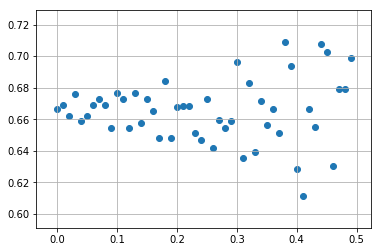

In [51]:
x = [i/100 for i in range(0,50)]
#plt.figure(figsize=(20,20))
plt.scatter(x , sc )
print(x[sc.index(max(sc))])
plt.grid(True)


# LogisticRegression

In [14]:
x_train,x_test,y_train,y_test = train_test_split(features,label , test_size=0.38)  #Max Accuracy

In [23]:
train_size = len(x_train)
predicted = defaultdict(list)

In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict = lr.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
lr.score(x_train,y_train)

0.6455026455026455

# NaiveBayes 

In [25]:
nb = GaussianNB()
nb.fit(x_train,y_train)
predict = nb.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [32]:
nb.score(x_train,y_train)

0.6349206349206349

# DecisionTree

In [26]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
predict = dt.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

In [36]:
dt.score(x_train,y_train)

0.9735449735449735

# SVM

In [29]:
svm = SVC()
svm.fit(x_train,y_train)
predict = svm.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
svm.score(x_train,y_train)

0.9259259259259259

# RandomForest

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predict = rf.predict(x_train)
for i in range(train_size):
    predicted[i].append(predict[i])

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
rf.score(x_train,y_train)

0.9417989417989417

In [50]:
predicted_df = pd.DataFrame(predicted)
soft_label = pd.DataFrame([pd.Series([(predicted_df.shape[0] - predicted_df[i].sum())/predicted_df.shape[0], predicted_df[i].sum()/predicted_df.shape[0]])  for i in range(predicted_df.shape[1])])
# print(soft_label)
final_label = [1 if predicted_df[i].sum()>3  else 0 if predicted_df[i].sum()<2 else -1 for i in range(predicted_df.shape[1])]
soft_label.columns = ['Chances of Death','Chances of Survival']
# soft_label.head(3)

,Chances of Death,Chances of Survival
0,0.4,0.6
1,0.0,1.0
2,0.6,0.4
